In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import agentpy as ap
from matplotlib import colors
from datetime import datetime
import sys

In [54]:
sys.setrecursionlimit(2000)


# basic square forest
# each cell has 3 possible states: 0, 1, 2 corresponding to empty, tree, fire
class square_forest:
	# ideally evolves till full destruction, but we can set a hard limit on time

	def __init__(self, dim):
		self.dim = dim  # dimension of square forest
		self.cells = np.zeros((self.dim, self.dim)) # forest grid init
		self.burnt = [] # not really a property, just easier to not pass this hehe; keeps track of how many trees were burnt and where in this forest instance
		self.grid_collector = [] # for the purpose of plotting

	def init_cells(self):
		# random init with some number of trees; upper limit = dim * dim
		n_max = np.random.randint(self.dim * self.dim) 

		loc_trees = set()
		for i in range(n_max):
			coords = tuple(np.random.randint(self.dim, size=2))
			loc_trees.add(coords)
			
		# planting trees
		for tree in loc_trees:
			# note here that the actual no. of trees in the init config is <= n_trees since the guessed locations need not be unique
			self.cells[tree[0], tree[1]] = 1

		# print(f"\nafter random tree planting: \n{self.cells}")
		self.grid_collector.append(self.cells)
	
	def get_valid_neighbours(self, cell):
		# checking for edge indices 
		row, col = cell[0], cell[1]
		if row < 0 : 
			raise Exception("negative row index encountered")

		elif col < 0 : 
			raise Exception("negative column index encountered")

		elif row >= self.dim : 
			raise Exception("row index out of dimension bounds")

		elif col >= self.dim : 
			raise Exception("column index out of dimension bounds")

		else:
			# we're safe from unruly indices
			neighbours = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)] # we're only interested in the adjacent cells according to the paper
			# print("\n -- adjacent cells indices are: ", neighbours)

			# marking useless neighbours i.e we only need cells with trees in the neighbourhood of interest
			for i, (r, c) in enumerate(neighbours):
				if r < 0 or c < 0 or r == self.dim or c == self.dim:
					neighbours[i] = None
				elif self.cells[r, c] != 1 :
					neighbours[i] = None

			# print("\n -- after None-ifying non tree cells and invalid edge cases: ", neighbours)

			# removing marked neighbour coords and appending only the valid ones
			valid_neighbours = []
			for n in neighbours:
				if n != None:
					valid_neighbours.append(n)

			# if len(valid_neighbours) != 0: print("\n List of valid neighbours: ", valid_neighbours) 

			return valid_neighbours

	
	def get_fire_loc(self):
		# randomly pick a fire location
		return np.random.randint(self.dim, size=2)

	
	def spread_to(self, valid_neighbours):
		# function to spread the fire to first degree neighbours; recursive
		# print("\n---------------------------\nThe next degree neighbours are at: ", valid_neighbours)
	
		# now we burn all of them:
		for (row, col) in valid_neighbours:
			# decimate: first set to 2
			self.cells[row, col] = 2
			self.burnt.append((row, col))
		
		self.grid_collector.append(self.cells)

		# spread to second degree neighbours
		for cell in valid_neighbours:
			next_neighbours = self.get_valid_neighbours(cell)
			if len(next_neighbours) != 0: # i.e has somewhere to spread to
				self.spread_to(next_neighbours)

	
	def simulate_fire_at(self, fire_loc):
		# takes a location as a param, simulates the spread of fire at that location; keeps tabs on how much area has been affected

		self.cells[fire_loc[0], fire_loc[1]] = 2
		self.burnt.append(fire_loc)

		# spread
		neighbours = self.get_valid_neighbours(fire_loc)
		self.spread_to(neighbours)	# spread_to() will set the states to 2
		self.grid_collector.append(self.cells)

		# now we change it to 0 so that the simulation can proceed as required
		for (r, c) in self.burnt:
			self.cells[r, c] = 0

		area_burnt = len(self.burnt)
		self.burnt = [] # reset for next fire # if the locs themselves are not used, replace with a simple counter
		self.grid_collector.append(self.cells)


		return area_burnt, self.grid_collector

	def plant_one_tree(self):
		# plants a NEW tree with probability 1 at a random location on the grid
		for i in range(self.dim * self.dim):
			coords = np.random.randint(self.dim, size=2)
			if self.cells[coords[0], coords[1]] != 1 : 
				
				# plant a tree since there is no tree here
				self.cells[coords[0], coords[1]] = 1 # planted
				self.grid_collector.append(self.cells)
				break


## Initialize some forest

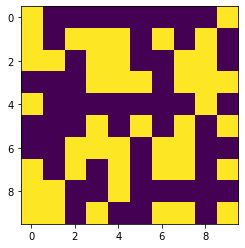

In [55]:
forest = square_forest(10)
forest.init_cells()
plt.imshow(forest.cells)

In [56]:
for i in range(50):
    #start_loc = forest.get_fire_loc()
    #area_burnt, grids = forest.simulate_fire_at(start_loc)
    forest.plant_one_tree()

grids = forest.grid_collector

In [57]:
len(grids)

50

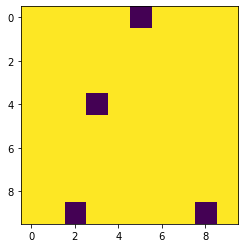

In [58]:
plt.imshow(grids[0])

## Plotting

In [51]:
from PIL import Image
import matplotlib.animation as animation

def animate_func(i):
    im.set_array(grids[i])
    return im 

IndexError: list index out of range

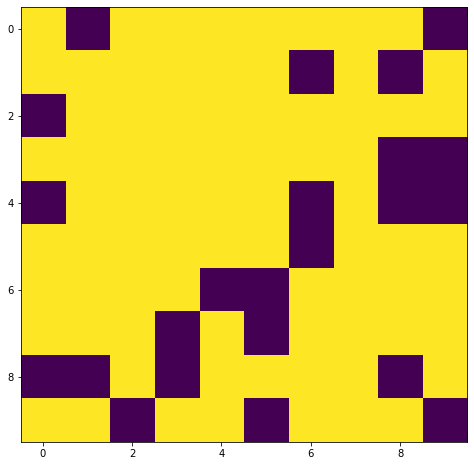

In [52]:
fps = 30
nsec = 5

fig = plt.figure(figsize=(8,8))

im = plt.imshow(grids[0], interpolation='none', aspect='auto', vmin=0, vmax=1)
anim = animation.FuncAnimation(fig, animate_func, frames=nsec*fps, interval=1000/fps, repeat=False)
anim.save('test_anim.mp4', fps=fps, )


In [24]:
color_dict = {0:'wheat', 1:'yellowgreen', 2:'darkorange'}


In [23]:
import PIL
from PIL import Image

# https://pillow.readthedocs.io/en/stable/reference/Image.html

img = Image.fromarray(grid_collector_arr[0], mode='RGB')
img.show() #doesn't work

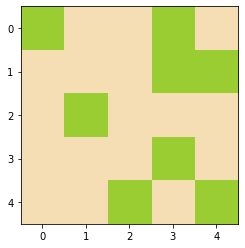

In [14]:
fig, ax = plt.subplots()
#plt.figure(figsize=(6,6))
color_dict = {0:'wheat', 1:'yellowgreen', 2:'darkorange'}
ap.gridplot(forest, ax=ax, color_dict=color_dict, convert=True)


In [47]:
## from the beginning with the entire class

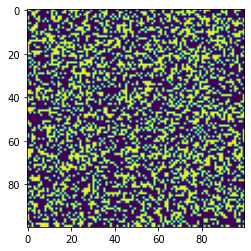

In [66]:
forest = square_forest(100)
forest.init_cells()
plt.imshow(forest.cells)

start_loc = forest.get_fire_loc()
area_burnt, grids = forest.simulate_fire_at(start_loc)
forest.plant_one_tree()


In [69]:
len(grids)

16

IndexError: list index out of range

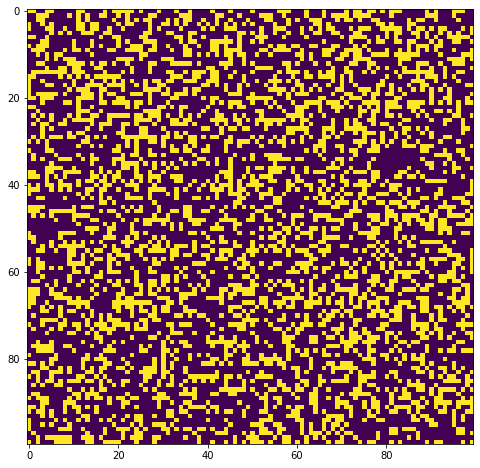

In [72]:
from PIL import Image
import matplotlib.animation as animation

def animate_func(i):
    im.set_array(grids[i])

fps = 30
fig = plt.figure( figsize=(8,8) )

im = plt.imshow(grids[0], interpolation='none', aspect='auto', vmin=0, vmax=1)
anim = animation.FuncAnimation(fig, animate_func, interval=1000/fps)
anim.save('test_anim.mp4')


In [ ]:
forest = square_forest(100)

for i in range(20):
    plant_tree(forest)
    #plt.imshow(forest)
    #plt.show()
    grid_collector.append(forest.copy())



In [49]:
def run_simulation(gridsize,fire_fq):
	# runs simulation and does housekeeping
	forest = square_forest(dim = gridsize) #initialize a square forest

	forest.init_cells()

	# not added the coin flipping between the two functions of burn vs plant tree yet
	start_loc = forest.get_fire_loc()
	area_burnt, grids = forest.simulate_fire_at(start_loc)
	
	forest.plant_one_tree()

	logfile = open(f"logfile_{str(fire_fq)}.txt", "a+")
	logfile.write(f"time: {datetime.now()}\tarea burnt: {area_burnt}\n")
	logfile.close()
	# close opened files
	

In [50]:
def main():
	# CSV in input files; txt files accepted. each line corresponds to one simulation param set
	# gridsize,firefq,numsims
	input_params = open("params.txt", "r+")
	
	for line in input_params.readlines():
		line = line.split(",")
		grid_size, fire_fq, num_sims = int(line[0]), float(line[1]), int(line[2])
		print(f"grid size: {grid_size}, fire freq: {fire_fq}, num sims: {num_sims}\nRunning.....")

		# running simulation for these params
		for i in range(num_sims):
			run_simulation(grid_size, fire_fq)
		

		print("Done!\n")